In [163]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

In [164]:
# y = ax + b + e
# where epsilon is standard gaussian.
# x is distributed as uniform rv between [0,10].

n = 100
x = np.random.uniform(0, 10, n)

# a be any real number
a = np.random.uniform(0, 4, 1)
b = np.random.uniform(0, 4, 1)
e = np.random.normal(0, 1, n)

y = a * x + b + e

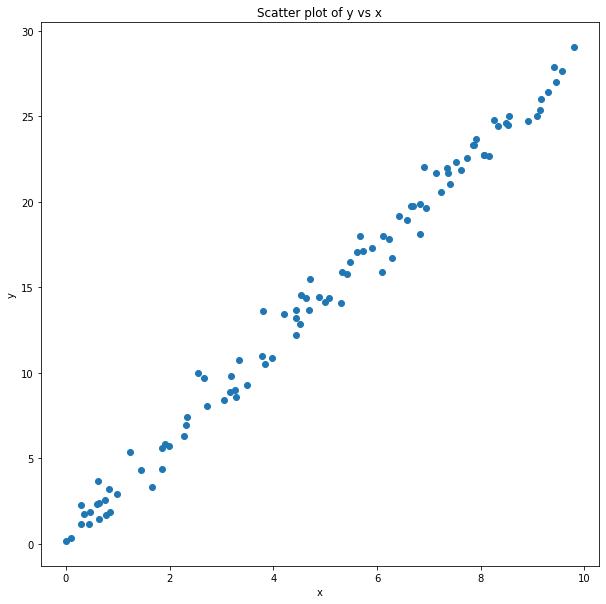

In [165]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [166]:
# normalise the data
x_norm = (x - x.mean()) / x.std()
y_norm = (y - y.mean()) / y.std()


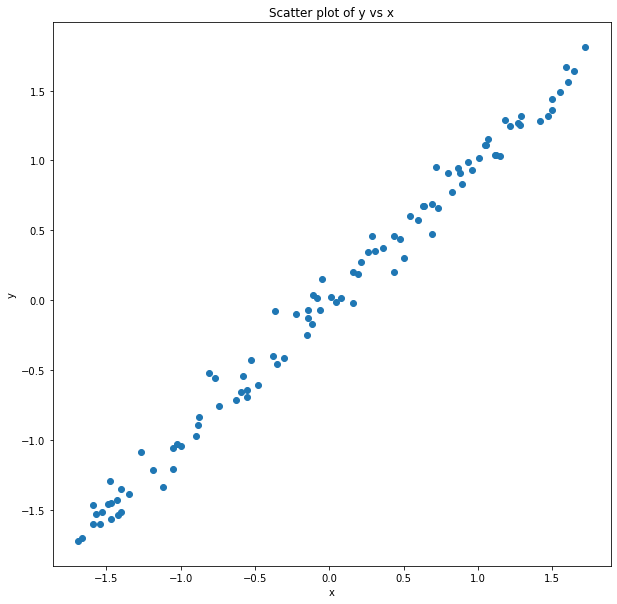

In [167]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x_norm, y_norm)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [168]:
def hypothesis(theta, x):
    '''
    This function calculates the hypothesis function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,)
        The input data.
    
    Returns
    -------
    float
        The output of the hypothesis function.

    '''
    #calculate the hypothesis function using theta and x
    #H(x) = transpose(theta) * x
    #if the length of x is one less than the length of theta then add a column of ones to x to the front
    if len(x) == len(theta) - 1:
        #print(len(x), len(theta))
        x = np.insert(x, 0, 1)
    return np.dot(theta, x)

In [169]:
def cost_function(theta, x, y):
    '''
    This function calculates the cost function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    
    Returns
    -------
    float
        The output of the cost function.

    '''
    cost=0
    
    
    for i in range(len(y)):
        cost += (hypothesis(theta, x[i]) - y[i])**2

   # print("cost = ",cost/2*(len(y)))
    return cost/2*(len(y))

In [170]:
def batch_gradient_descent(theta, x, y, alpha, iterations,epsilon):
    '''
    This function calculates the gradient descent

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    alpha : float
        The learning rate.
    iterations : int
        The number of iterations.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the gradient descent.

    '''
    #calculate the gradient descent
    #store all the values of theta in a list and corresponding cost in another list
    theta_list = []
    cost_list = []
    #repeat until convergence
    print(theta,"cost is",cost_function(theta, x, y))
    theta_list.append(theta)
    cost_list.append(cost_function(theta, x, y))
    for i in range(iterations):
        # if i > 0 and i%100 == 0:
        #     print(i)
        temp_theta = theta.copy()
        for j in range(len(theta)):
            temp=0
            for k in range(len(y)):
                temp+=(hypothesis(theta, x[k]) - y[k])*x[k][j]
            # theta[j] = theta[j] - alpha*(1/(len(y)))*temp
            temp_theta[j] = temp_theta[j] - alpha*(1/(len(y)))*temp
        theta = temp_theta.copy()
        #compare current loss with previous loss if loss is not decreasing then break
        print(theta,"cost is",cost_function(theta, x, y))
        theta_list.append(theta)
        cost_list.append(cost_function(theta, x, y))
        if i>0:
            if cost_list[i-1]-cost_list[i] < epsilon:
                break
        

    return theta, theta_list, cost_list

In [171]:
def predict_batch(theta, x):
    '''
    This function calculates the predicted values

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the predicted values.

    '''
    #calculate the predicted values
    y_pred = []
    for i in range(len(x)):
        y_pred.append(hypothesis(theta, x[i]))
    return y_pred

In [172]:
def augment (X, d, aug_intercept = False):
    if aug_intercept:
        X = np.c_[np.ones(len(X)), X]
    for i in range(2,d+1):
        X = np.c_[X, np.power(X[:,1],i)]

    return X

In [173]:
X_aug_2 = augment(x_norm, 2, aug_intercept = True)
X_aug_5 = augment(x_norm, 5, aug_intercept = True)
X_aug_10 = augment(x_norm, 10, aug_intercept = True)

In [174]:
# normalise each feature
for i in range(1,len(X_aug_2[0])):
    X_aug_2[:,i] = (X_aug_2[:,i] - X_aug_2[:,i].mean()) / X_aug_2[:,i].std()
for i in range(1,len(X_aug_5[0])):
    X_aug_5[:,i] = (X_aug_5[:,i] - X_aug_5[:,i].mean()) / X_aug_5[:,i].std()
for i in range(1,len(X_aug_10[0])):
    X_aug_10[:,i] = (X_aug_10[:,i] - X_aug_10[:,i].mean()) / X_aug_10[:,i].std()


In [175]:
print(X_aug_2[0])
print(X_aug_5[0])
print(X_aug_10[0])

[ 1.         -0.55610749 -0.77202845]
[ 1.         -0.55610749 -0.77202845 -0.04146861 -0.72583123  0.04971547]
[ 1.         -0.55610749 -0.77202845 -0.04146861 -0.72583123  0.04971547
 -0.62168215  0.05923152 -0.543679    0.0532792  -0.48542136]


In [176]:
theta02 = np.zeros(len(X_aug_2[0]))
theta05 = np.zeros(len(X_aug_5[0]))
theta10 = np.zeros(len(X_aug_10[0]))


In [177]:
theta2, theta_list2, cost_list2 = batch_gradient_descent(theta02, X_aug_2, y_norm, alpha = 0.01, iterations = 1000, epsilon = 0.0001)

[0. 0. 0.] cost is 4999.999999999999
[ 3.46389584e-18  9.94584262e-03 -1.09117348e-03] cost is 4900.401145574229
[ 6.86117829e-18  1.97911170e-02 -2.16131925e-03] cost is 4802.827595821044
[ 1.01252340e-17  2.95368501e-02 -3.21074988e-03] cost is 4707.237781906508
[ 1.39444012e-17  3.91840586e-02 -4.23977376e-03] cost is 4613.590995606738
[ 1.75637282e-17  4.87337483e-02 -5.24869518e-03] cost is 4521.8473713487365
[ 2.07611706e-17  5.81869150e-02 -6.23781433e-03] cost is 4431.967868628737
[ 2.42028619e-17  6.75445439e-02 -7.20742743e-03] cost is 4343.914254800026
[ 2.77777801e-17  7.68076104e-02 -8.15782670e-03] cost is 4257.64908822233
[ 3.13304938e-17  8.59770795e-02 -9.08930046e-03] cost is 4173.135701765339
[ 3.44613227e-17  9.50539066e-02 -1.00021332e-02] cost is 4090.338186658629
[ 3.76587650e-17  1.04039037e-01 -1.08966054e-02] cost is 4009.221376680878
[ 4.05453449e-17  1.12933406e-01 -1.17729942e-02] cost is 3929.7508326810466
[ 4.37427872e-17  1.21737940e-01 -1.26315725e-02] 

In [178]:
# get axis to plot based on min x and max x


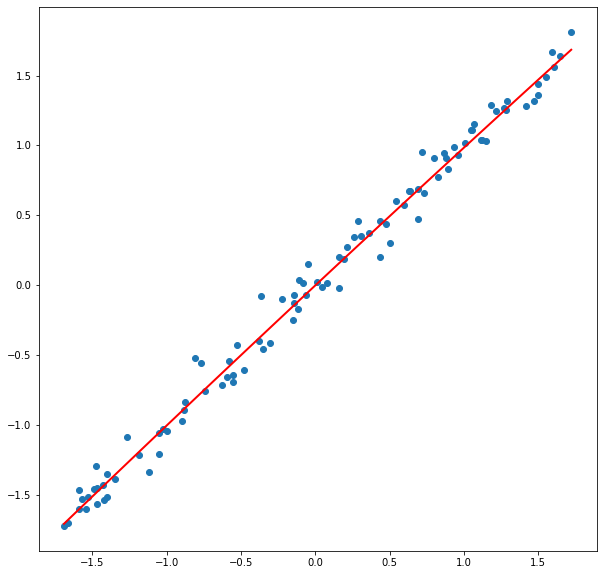

In [179]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)

# plot the line
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 2, aug_intercept = True)
y_pred = predict_batch(theta2, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)





In [180]:
theta5 , theta_list5, cost_list5 = batch_gradient_descent(theta05, X_aug_5, y_norm, alpha = 0.01, iterations = 1000, epsilon = 0.0001)

[0. 0. 0. 0. 0. 0.] cost is 4999.999999999999
[ 3.46389584e-18  9.94584262e-03 -1.09117348e-03  9.15958424e-03
 -1.24549470e-03  8.29960880e-03] cost is 4749.184744273553
[ 6.99440506e-18  1.96358126e-02 -2.13105000e-03  1.80520727e-02
 -2.43730995e-03  1.63411711e-02] cost is 4512.466424267037
[ 1.03472786e-17  2.90772043e-02 -3.12146853e-03  2.66851369e-02
 -3.57734723e-03  2.41321234e-02] cost is 4289.045057086344
[ 1.36557432e-17  3.82771020e-02 -4.06420812e-03  3.50662276e-02
 -4.66744629e-03  3.16796881e-02] cost is 4078.1661767606197
[ 1.70530257e-17  4.72423861e-02 -4.96098980e-03  4.32025809e-02
 -5.70938715e-03  3.89908798e-02] cost is 3879.1182405620816
[ 2.05613304e-17  5.59797390e-02 -5.81347834e-03  5.11012248e-02
 -6.70489188e-03  4.60725110e-02] cost is 3691.2301832649036
[ 2.39364084e-17  6.44956508e-02 -6.62328405e-03  5.87689848e-02
 -7.65562646e-03  5.29311982e-02] cost is 3513.8691108995276
[ 2.70894418e-17  7.27964249e-02 -7.39196441e-03  6.62124899e-02
 -8.563202

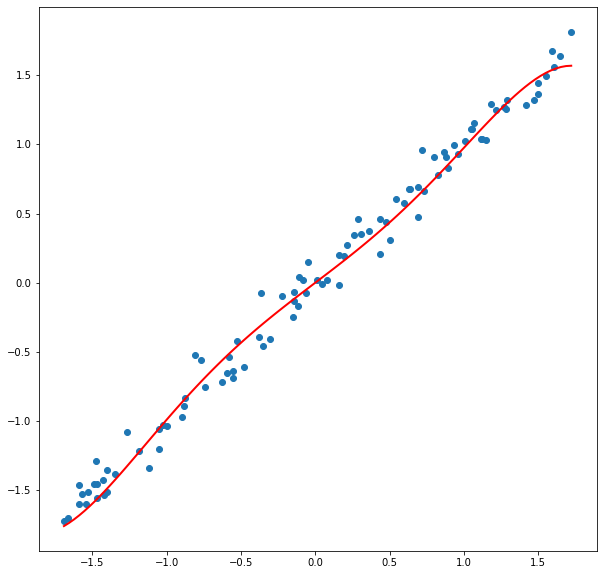

In [181]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 5, aug_intercept = True)
y_pred = predict_batch(theta5, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()


In [193]:
theta10 , theta_list10, cost_list10 = batch_gradient_descent(theta10, X_aug_10, y_norm, alpha = 0.1, iterations = 10000, epsilon = 0.000001)

[ 3.91012223e-16  9.93733986e-01 -1.43108044e-02  1.34654745e-01
 -3.34698098e-02 -1.53207627e-01 -3.89178317e-02 -8.16233609e-02
 -6.69946730e-03  1.56428105e-01  2.41631362e-02] cost is 87.08985801798305
[ 3.91345290e-16  9.88495800e-01 -7.99181599e-03  1.28947073e-01
 -2.67462956e-02 -1.58876701e-01 -3.22278965e-02 -8.70859571e-02
 -1.94207823e-04  1.51252459e-01  3.04072480e-02] cost is 60.18092008506321
[ 3.93010624e-16  9.85902442e-01 -4.86262999e-03  1.26132774e-01
 -2.34150614e-02 -1.61688221e-01 -2.89155151e-02 -8.97947761e-02
  3.02798253e-03  1.48699818e-01  3.35001466e-02] cost is 53.586833047313874
[ 3.93010624e-16  9.84617558e-01 -3.31315776e-03  1.24749868e-01
 -2.17638253e-02 -1.63086101e-01 -2.72758632e-02 -9.11413308e-02
  4.62420499e-03  1.47444712e-01  3.50323454e-02] cost is 51.97088169039398
[ 3.93732269e-16  9.83979954e-01 -2.54607292e-03  1.24075023e-01
 -2.09446500e-02 -1.63784720e-01 -2.64646863e-02 -9.18140575e-02
  5.41509475e-03  1.46831395e-01  3.57915187e

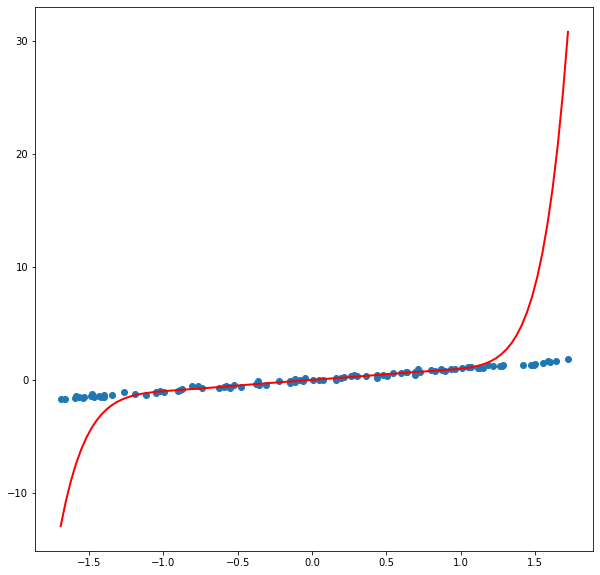

In [194]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 10, aug_intercept = True)
y_pred = predict_batch(theta10, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()

In [203]:
n = 10000
x = np.random.uniform(0, 10, n)

# a be any real number
a = np.random.uniform(0, 20, 1)
b = np.random.uniform(0, 20, 1)
e = np.random.normal(0, 1, n)

y = a * x + b + e

In [204]:
x_norm = (x - x.mean()) / x.std()
y_norm = (y - y.mean()) / y.std()

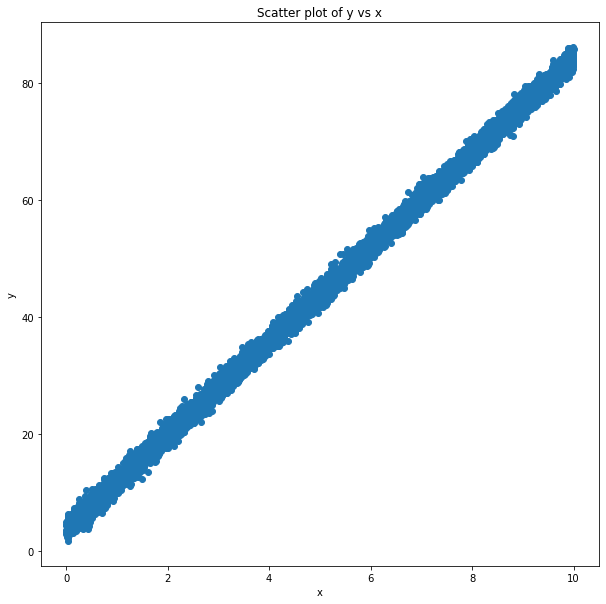

In [205]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [208]:
X_aug_large_10 = augment(x_norm, 10, aug_intercept = True)

for i in range(1,len(X_aug_10[0])):
    X_aug_large_10[:,i] = (X_aug_large_10[:,i] - X_aug_large_10[:,i].mean()) / X_aug_large_10[:,i].std()


In [216]:
theta10 , theta_list10, cost_list10 = batch_gradient_descent(theta10, X_aug_large_10, y_norm, alpha = 0.3, iterations = 1000, epsilon = 0.00000001)

[-1.19776689e-15 -1.25024733e+00 -4.44012891e+00 -2.16960101e+00
 -4.73616720e+00 -2.61684119e+00 -4.77805082e+00 -2.42696566e+00
 -4.62421126e+00 -1.86533983e+00 -4.47058293e+00] cost is 29330282123.451576
[-9.43037315e-16  1.37132873e+00  1.63836326e+00  6.95214035e-01
  1.74633039e+00  1.69288405e-01  1.70582004e+00  2.03332998e-01
  1.72687852e+00  5.89550257e-01  1.69714694e+00] cost is 3501175601.400847
[-6.26330654e-16  9.43266230e-01 -6.27953347e-01  2.49275011e-01
 -6.80167026e-01 -2.41463045e-01 -7.30554512e-01 -1.60874479e-01
 -6.68834289e-01  2.73633280e-01 -6.38491645e-01] cost is 532043134.77024335
[-4.72906714e-16  8.97333464e-01  2.73091028e-01  1.82227473e-01
  2.88200823e-01 -3.24679303e-01  2.45270751e-01 -2.58328690e-01
  2.94173907e-01  1.63264870e-01  3.03804483e-01] cost is 101429644.30684155
[-3.67231245e-16  9.96162687e-01 -1.06868638e-01  3.00755416e-01
 -1.21588676e-01 -1.98408598e-01 -1.69104766e-01 -1.27900161e-01
 -1.16151645e-01  2.96384631e-01 -9.9038002

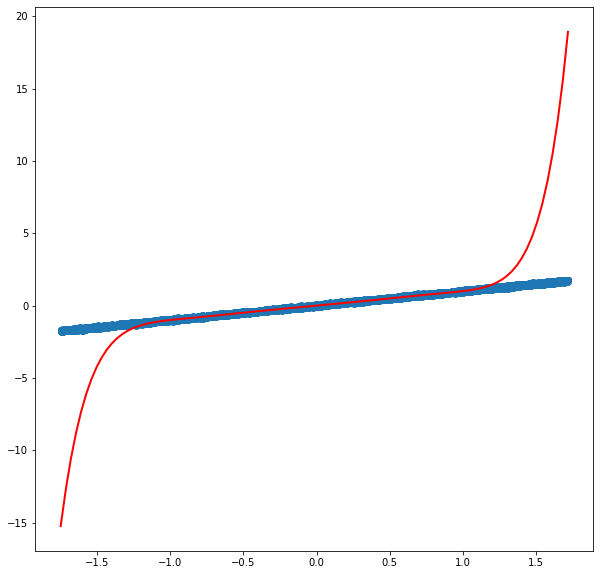

In [217]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 10, aug_intercept = True)
y_pred = predict_batch(theta10, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()

In [221]:
X_aug_large_5 = augment(x_norm, 5, aug_intercept = True)

for i in range(1,len(X_aug_5[0])):
    X_aug_large_5[:,i] = (X_aug_large_5[:,i] - X_aug_large_5[:,i].mean()) / X_aug_large_5[:,i].std()


In [222]:
theta5 , theta_list5, cost_list5 = batch_gradient_descent(theta5, X_aug_large_5, y_norm, alpha = 0.3, iterations = 1000, epsilon = 0.00000001)

[ 3.89888122e-16  8.16999552e-01  6.39311538e-03  2.22909647e-01
 -1.40047584e-02 -5.76959852e-02] cost is 287797.2333809741
[ 2.40402698e-16  8.24422871e-01  8.85682818e-03  2.22998008e-01
 -1.12856425e-02 -6.06815799e-02] cost is 264676.0904346721
[ 1.35912948e-16  8.30366653e-01  9.80591979e-03  2.21942579e-01
 -1.00774608e-02 -6.45613240e-02] cost is 247469.03966096469
[ 6.21494523e-17  8.35790708e-01  1.01024705e-02  2.20724897e-01
 -9.53098795e-03 -6.84071071e-02] cost is 232569.9611406044
[ 1.15407683e-17  8.40878609e-01  1.01288774e-02  2.19513484e-01
 -9.26562939e-03 -7.20707863e-02] cost is 219332.5418653473
[-2.45986564e-17  8.45680867e-01  1.00473257e-02  2.18340126e-01
 -9.11911096e-03 -7.55331623e-02] cost is 207513.57895180836
[-4.99042474e-17  8.50221473e-01  9.92541434e-03  2.17210833e-01
 -9.02339062e-03 -7.87982524e-02] cost is 196950.68488968123
[-6.82837120e-17  8.54517447e-01  9.79102628e-03  2.16125753e-01
 -8.95007676e-03 -8.18747458e-02] cost is 187508.15008709

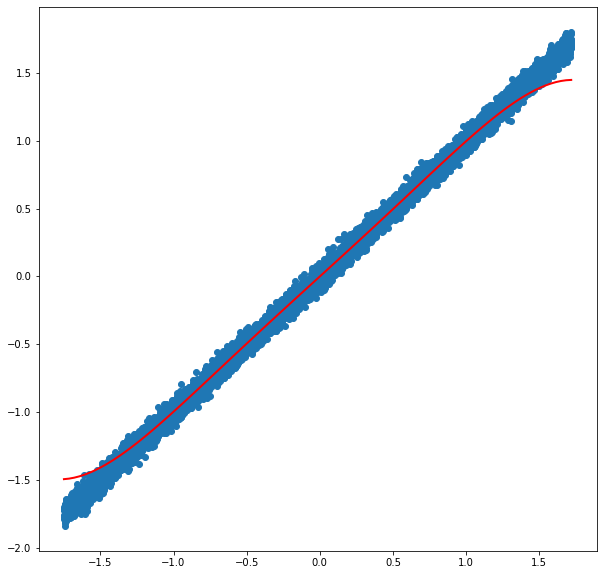

In [223]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 5, aug_intercept = True)
y_pred = predict_batch(theta5, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()